In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential
from sklearn.model_selection import train_test_split

from traffic import load_data as ld

In [2]:
images, labels = ld('../gtsrb/')
num_classes = 43

x_train, x_test, y_train, y_test = train_test_split(
    np.array(images), np.array(labels), test_size=0.2
)

""" Standardize the data """
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [21]:
# Dropout

model_dropout = Sequential([
    layers.Conv2D(16, 3, activation='relu', input_shape=(50, 50, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
epochs = 15
history = model_dropout.fit(
    x_train, y_train, 
    # validation_data=(x_test, y_test), 
    epochs=epochs
)

Epoch 1/15
666/666 [==============================] - 7s 10ms/step - loss: 1.8745 - accuracy: 0.4751
Epoch 2/15
666/666 [==============================] - 6s 10ms/step - loss: 0.5254 - accuracy: 0.8395
Epoch 3/15
666/666 [==============================] - 6s 10ms/step - loss: 0.2957 - accuracy: 0.9098
Epoch 4/15
666/666 [==============================] - 7s 10ms/step - loss: 0.2044 - accuracy: 0.9386
Epoch 5/15
666/666 [==============================] - 7s 10ms/step - loss: 0.1614 - accuracy: 0.9509
Epoch 6/15
666/666 [==============================] - 6s 10ms/step - loss: 0.1350 - accuracy: 0.9587
Epoch 7/15
666/666 [==============================] - 7s 10ms/step - loss: 0.1112 - accuracy: 0.9656
Epoch 8/15
666/666 [==============================] - 7s 11ms/step - loss: 0.0950 - accuracy: 0.9703
Epoch 9/15
666/666 [==============================] - 7s 10ms/step - loss: 0.0892 - accuracy: 0.9724
Epoch 10/15
666/666 [==============================] - 7s 10ms/step - loss: 0.0785 - accura

In [ ]:
""" Visualize result """
acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

loss = history.history['loss']
# val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
    np.array(images), np.array(labels), test_size=0.2
)

""" Standardize the data """
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [24]:
model_dropout.evaluate(x_test, y_test)

167/167 [==============================] - 1s 4ms/step - loss: 0.0436 - accuracy: 0.9925


[0.04356847330927849, 0.9924924969673157]

In [36]:
images, labels = ld('../gtsrb-small-jpeg-Kopie')
images = np.array(images) / 255.0

20
0.996693


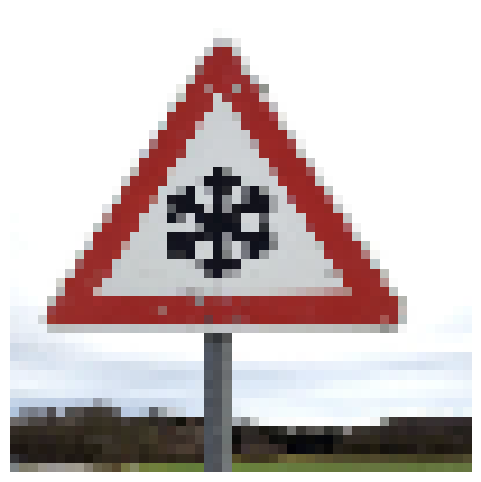

In [41]:
i = 3

plt.figure(figsize=(6,6))
# ax = plt.subplot(5, 5, i+1)
plt.imshow(images[i])
plt.axis("off")

predictions = model_dropout(tf.expand_dims(images[i], 0))
print(np.where(predictions == np.max(predictions))[1][0])
print(np.max(predictions))

In [15]:
predictions

<tf.Tensor: shape=(1, 43), dtype=float32, numpy=
array([[6.27447702e-16, 2.08548179e-09, 1.41546252e-05, 1.33512949e-11,
        1.06594893e-23, 1.86481799e-07, 2.19550838e-14, 2.85306925e-07,
        1.39315794e-12, 4.36881043e-12, 4.19314757e-13, 6.55333340e-01,
        4.54799701e-05, 1.61734992e-23, 3.46702615e-12, 1.93498742e-19,
        5.16792206e-05, 1.38241232e-14, 1.16673810e-03, 3.50233142e-16,
        3.43036443e-01, 3.51578601e-15, 8.17166433e-17, 1.61611879e-05,
        3.16119492e-10, 1.32710556e-05, 1.75276626e-04, 3.90873902e-05,
        3.42066606e-08, 6.53666167e-14, 1.51646600e-06, 1.04672334e-04,
        1.67606407e-09, 2.13568292e-20, 1.27932124e-16, 6.76416037e-19,
        8.61616578e-16, 3.37713942e-16, 4.60975008e-11, 2.97899509e-32,
        1.64819107e-06, 1.38351055e-13, 3.13647774e-08]], dtype=float32)>